In [9]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import plotly.express as px
import plotly.graph_objects as go
from scipy import stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Lectura de datos

In [17]:
df = pd.read_csv('../Datasets/Pizza.csv',dtype={'id':str})

## Diccionario de datos

+ brand -- Pizza brand (class label)
+ id -- Sample analysed
+ mois -- Amount of water per 100 grams in the sample
+ prot -- Amount of protein per 100 grams in the sample
+ fat -- Amount of fat per 100 grams in the sample
+ ash -- Amount of ash per 100 grams in the sample
+ sodium -- Amount of sodium per 100 grams in the sample
+ carb -- Amount of carbohydrates per 100 grams in the sample
+ cal -- Amount of calories per 100 grams in the sample

[Descarga el dataset](https://data.world/sdhilip/pizza-datasets)

In [18]:
df.describe()

,mois,prot,fat,ash,sodium,carb,cal
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,40.903067,13.373567,20.229533,2.633233,0.669400,22.864767,3.271000
std,9.552987,6.434392,8.975658,1.269724,0.370358,18.029722,0.620034
min,25.000000,6.980000,4.380000,1.170000,0.250000,0.510000,2.180000
25%,30.902500,8.060000,14.770000,1.450000,0.450000,3.467500,2.910000
50%,43.300000,10.440000,17.135000,2.225000,0.490000,23.245000,3.215000
75%,49.115000,20.022500,21.435000,3.592500,0.702500,41.337500,3.520000
max,57.220000,28.480000,47.200000,5.430000,1.790000,48.640000,5.080000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   brand   300 non-null    object 
 1   id      300 non-null    object 
 2   mois    300 non-null    float64
 3   prot    300 non-null    float64
 4   fat     300 non-null    float64
 5   ash     300 non-null    float64
 6   sodium  300 non-null    float64
 7   carb    300 non-null    float64
 8   cal     300 non-null    float64
dtypes: float64(7), object(2)
memory usage: 21.2+ KB


array([[<AxesSubplot:title={'center':'mois'}>,
        <AxesSubplot:title={'center':'prot'}>,
        <AxesSubplot:title={'center':'fat'}>],
       [<AxesSubplot:title={'center':'ash'}>,
        <AxesSubplot:title={'center':'sodium'}>,
        <AxesSubplot:title={'center':'carb'}>],
       [<AxesSubplot:title={'center':'cal'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

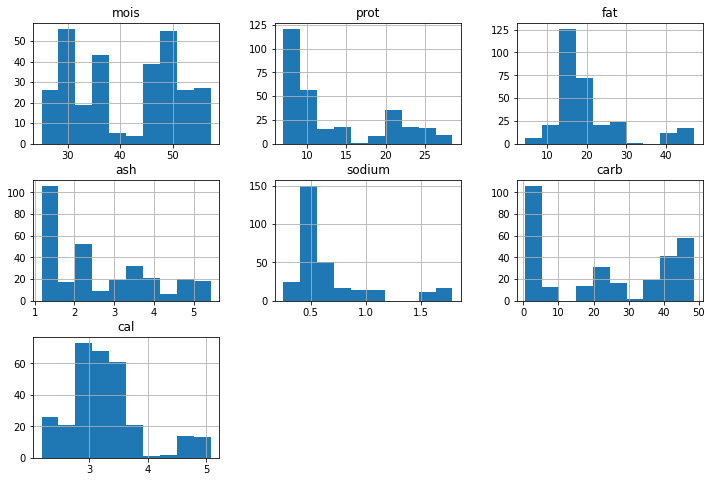

In [29]:
df.hist(figsize=(12,8))

In [47]:
df_valores = df.drop(['brand','id'],axis=1)
scaler = StandardScaler()
df_valores_z = scaler.fit_transform(df_valores)
df_valores_z = pd.DataFrame(df_valores_z).rename(columns={
    0:'mois',
    1:'prot',
    2:'fat',
    3:'ash',
    4:'sodium',
    5:'carb',
    6:'cal'
})

df_valores_z

,mois,prot,fat,ash,sodium,carb,cal
0,-1.371815,1.254181,2.749841,1.953894,2.976687,-1.227511,2.680129
1,-1.301562,1.227717,2.640475,2.135338,3.030779,-1.213622,2.534733
2,-1.316242,1.030010,2.851396,1.930227,2.598042,-1.225844,2.712439
3,-1.085563,1.054918,2.555660,1.701449,2.543950,-1.193622,2.373183
4,-1.091854,1.230830,2.390494,1.725116,2.625088,-1.172510,2.260097
...,...,...,...,...,...,...,...
295,0.420144,-0.358607,-0.360411,-0.112995,-0.025423,0.138627,-0.583199
296,0.235600,-0.246521,-0.197477,-0.160329,0.001623,0.072514,-0.276252
297,0.382396,-0.367947,-0.468662,-0.160329,-0.079515,0.173072,-0.567044
298,0.702202,-0.458238,-0.563521,-0.247106,-0.295884,0.089181,-0.825525


In [82]:
cor = df_valores.corr()
fig = go.Figure(go.Heatmap(x=cor.columns,y=cor.index,z=cor.values))
fig.show()

In [38]:
pca = PCA(n_components=7)
principalComponents = pca.fit_transform(df_valores_z)
PCA_components = pd.DataFrame(principalComponents)
PCA_components.rename(columns={
    0:'Componente 1',
    1:'Componente 2',
    2:'Componente 3',
    3:'Componente 4',
    4:'Componente 5',
    5:'Componente 6',
    6:'Componente 7',
},inplace=True)

df_pca = pd.concat([df_valores_z.reset_index(),PCA_components],axis=1,sort=False).drop('index',axis=1)
df_pca

,mois,prot,fat,ash,sodium,carb,cal,Componente 1,Componente 2,Componente 3,Componente 4,Componente 5,Componente 6,Componente 7
0,-1.371815,1.254181,2.749841,1.953894,2.976687,-1.227511,2.680129,5.010343,2.679215,-0.039327,0.144106,-0.284015,0.002339,-0.000960
1,-1.301562,1.227717,2.640475,2.135338,3.030779,-1.213622,2.534733,5.023755,2.529295,-0.097056,0.353950,-0.215269,-0.002952,-0.001022
2,-1.316242,1.030010,2.851396,1.930227,2.598042,-1.225844,2.712439,4.805439,2.673700,-0.075475,-0.107798,0.035038,-0.005424,-0.000832
3,-1.085563,1.054918,2.555660,1.701449,2.543950,-1.193622,2.373183,4.469543,2.285029,-0.120233,-0.054028,-0.174501,-0.005627,-0.000946
4,-1.091854,1.230830,2.390494,1.725116,2.625088,-1.172510,2.260097,4.471893,2.159152,-0.000738,0.117166,-0.313027,-0.001689,-0.000968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.420144,-0.358607,-0.360411,-0.112995,-0.025423,0.138627,-0.583199,-0.535510,-0.530843,-0.426490,0.229258,-0.031016,-0.050825,0.034726
296,0.235600,-0.246521,-0.197477,-0.160329,0.001623,0.072514,-0.276252,-0.339636,-0.243230,-0.281174,0.064289,-0.069664,0.000082,-0.000233
297,0.382396,-0.367947,-0.468662,-0.160329,-0.079515,0.173072,-0.567044,-0.646433,-0.515434,-0.370378,0.249294,-0.043557,-0.002110,-0.000239
298,0.702202,-0.458238,-0.563521,-0.247106,-0.295884,0.089181,-0.825525,-0.865078,-0.921790,-0.493755,0.127400,0.024342,-0.001823,-0.000163


# Análisis del modelo

([<matplotlib.axis.XTick at 0x7f88a588ac50>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

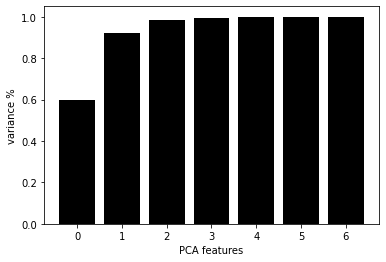

In [49]:
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_.cumsum(), color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

In [250]:
cols = ['mois' ,'prot' ,'fat' ,'ash' ,'sodium','carb','cal']
componentes = pd.DataFrame(pca.components_)
componentes.insert(0,'var',cols)
componentes.set_index('var',inplace=True)
componentes.rename(columns={i:cols[i] for i in range(len(cols))},inplace=True)
componentes

,mois,prot,fat,ash,sodium,carb,cal
var,,,,,,,
mois,0.064709,0.378761,0.446666,0.471890,0.435703,-0.424914,0.244487
prot,-0.628276,-0.269707,0.234379,-0.110990,0.201662,0.320312,0.567458
fat,-0.421669,0.746027,-0.199309,0.056273,-0.455169,0.052237,0.113316
ash,-0.220722,-0.010593,-0.507042,0.552399,0.446277,0.334339,-0.279263
sodium,-0.006470,-0.387983,0.173368,0.670886,-0.602614,0.007437,0.078003
carb,0.446450,-0.000172,-0.525403,0.058861,0.003131,-0.000509,0.721914
cal,0.418569,0.276765,0.377672,0.056021,-0.000524,0.776068,0.012060


## Descripción de las componentes

+ Componente 1: Bajo en proteína, bajo en grasa, alto en carbohidratos, alto en calorías (pizzas medio sintéticas, mucho pan)

+ Componente 2: Alto en humedad, alto en grasa, baja en sodio (liru sisa)

In [253]:
df_pca[['id','brand','mois' ,'prot' ,'fat' ,'ash' ,'sodium','carb','cal']] = df[['id','brand','mois' ,'prot' ,'fat' ,'ash' ,'sodium','carb','cal']]
fig = px.scatter(df_pca,x='Componente 1',y='Componente 2',color='brand',hover_data=['id','brand','mois' ,'prot' ,'fat' ,'ash' ,'sodium','carb','cal'])
fig.update_layout(
    shapes=[
        # unfilled circle
        dict(
            type="circle",
            xref="x",
            yref="y",
            x0=1,
            y0=1,
            x1=-1,
            y1=-1,
            line_color="LightSeaGreen",
        )],
    height=600,
    width=800,
    showlegend=True,
    paper_bgcolor =  'rgba(0, 0, 0, 0)',
    #plot_bgcolor='rgba(0,0,0,0)',
)

fig.add_trace(go.Scatter(x=[0,df_valores_z['mois'].corr(df_pca['Componente 1'])],
                         y=[0,df_valores_z['mois'].corr(df_pca['Componente 2'])],
                        name='mois',
                        line = dict(color='rgb(255,51,0)')
                        )
             )

fig.add_trace(go.Scatter(x=[0,df_valores_z['prot'].corr(df_pca['Componente 1'])],
                         y=[0,df_valores_z['prot'].corr(df_pca['Componente 2'])],
                        name='prot',
                        line = dict(color='rgb(0,0,0)')
                        )
             )

fig.add_trace(go.Scatter(x=[0,df_valores_z['fat'].corr(df_pca['Componente 1'])],
                         y=[0,df_valores_z['fat'].corr(df_pca['Componente 2'])],
                        name='fat',
                        line = dict(color='rgb(0, 127, 254)')
                        )
             )

fig.add_trace(go.Scatter(x=[0,df_valores_z['ash'].corr(df_pca['Componente 1'])],
                         y=[0,df_valores_z['ash'].corr(df_pca['Componente 2'])],
                        name='ash',
                        line = dict(color='rgb(254,246,0)')
                        )
             )

fig.add_trace(go.Scatter(x=[0,df_valores_z['sodium'].corr(df_pca['Componente 1'])],
                         y=[0,df_valores_z['sodium'].corr(df_pca['Componente 2'])],
                        name='sodium',
                        line = dict(color='rgb( 0, 254, 62 )')
                        )
             )

fig.add_trace(go.Scatter(x=[0,df_valores_z['carb'].corr(df_pca['Componente 1'])],
                         y=[0,df_valores_z['carb'].corr(df_pca['Componente 2'])],
                        name='carb',
                        line = dict(color='rgb(254, 0, 142)')
                        )
             )

fig.add_trace(go.Scatter(x=[0,df_valores_z['cal'].corr(df_pca['Componente 1'])],
                         y=[0,df_valores_z['cal'].corr(df_pca['Componente 2'])],
                        name='cal',
                        line = dict(color='rgb(254, 142, 0)')
                        )
             )


fig.show()